# Проект: Выявление закономерностей, определяющих успешность игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### План выполнения проекта:

#### <a href=#1>1. Изучение данных</a>

#### <a href=#2>2. Подготовка данных:</a>
    - Приведение к нижнему регистру названий столбцов;
    - Преобразование данных в нужные типы;
    - Обработать пропуски при необходимости;
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
#### <a href=#3>3. Провести исследовательский анализ данных</a>
    - Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Выделить данные за соответствующий актуальный период.
    - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
#### <a href=#4>4. Составить портрет пользователя каждого региона</a>
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
#### <a href=#5>5. Проверка гипотез:</a>
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
#### <a href=#6>6. Вывод.</a>

## <a id='1'> 1. Изучение данных</a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st

In [2]:
games = pd.read_csv('\practikum\games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(games.describe())

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [5]:
isna_data = pd.DataFrame(games.isna().sum())
isna_data.columns = ['nan']
isna_data['rate'] = isna_data['nan']/len(games)
isna_data.style.format("{:.2%}", subset='rate')

In [6]:
games.duplicated().sum()

0

<b>Вывод:</b>
- В столбце User_Score (Оценка пользователей) данные представлены в формате object вместо float. Необходимо выяснить причину и привести к нужному формату.
- Данные в столбце Year_of_Release (Год выпуска) указаны в формате float. Их необходимо привести в формат int, так как год может быть указан только целым числом.
- Пропуски (2 значения) в столбцах Name и Genre необходимо удалить, так как заменить их самостоятельно на какое-либо значение невозможно.
- Имеются пропуски в столбцах Year_of_Release (1.14%), Critic_Score (36.20%), User_Score (28.28%) и Rating (28.55%)

## <a id='2'> 2. Подготовка данных:</a> 


### Приведение к нижнему регистру названий столбцов

In [7]:
games.set_axis(games.columns.str.lower(), axis='columns', inplace=True)
games.head(3)

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   
2     Mario Kart Wii      Wii           2008.0    Racing     15.68     12.76   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E

### Суммарные продажи во всех регионах

In [8]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

### Обработка пропусков

Заменим некоторые пропуски в столбце year_of_release на имеющиеся значения в дубликатах названий.

In [9]:
unique_name = games.pivot_table(index='name', values=['platform', 'year_of_release'], 
                                aggfunc={'platform': 'count',
                                         'year_of_release': np.median})
missing_values = games.query('name in @unique_name.index & year_of_release=="nan"')

In [10]:
unique_name = unique_name.query('name in @missing_values.name & year_of_release!="nan"')
unique_name.sort_values('platform', ascending=False)

platform  year_of_release
name                                                                  
Madden NFL 07                                       9           2006.0
LEGO Harry Potter: Years 5-7                        8           2012.0
Madden NFL 06                                       7           2005.0
LEGO Indiana Jones: The Original Adventures         7           2008.0
LEGO Batman: The Videogame                          7           2008.0
...                                               ...              ...
Nicktoons: Battle for Volcano Island                2           2006.0
Pac-Man Fever                                       2           2001.0
Record of Agarest War Zero                          2           2010.0
Rhythm Heaven                                       2           2008.0
World of Tanks                                      2           2011.0

[99 rows x 2 columns]

In [11]:
for index in unique_name.index:
    games.loc[games['name']==index, 'year_of_release']=games.loc[games['name']==index, 'year_of_release'].fillna(unique_name.year_of_release[index])

Данные с пропусками в столбце <b>name</b> удалим. Эти пропуски невозможно заменить на что-либо. Все данные не информативны без названия игры.

In [12]:
games.dropna(subset=['name'], inplace=True)
games.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
total_sales           0
dtype: int64

Пропуски в столбцах critic_score и user_score невозможно заменить, так как, скорее всего, они являются важным показателем для оценки популярности игры. 

In [13]:
no_rating = games.loc[(games['rating'].isna()==True) & 
                      (games['critic_score'].isna()==True) & 
                      (games['user_score'].isna()==True) &
                      (games['year_of_release']>0)
                     ].pivot_table(index='year_of_release',
                                   values='total_sales',
                                   aggfunc=['count', 'mean']).reset_index(drop=False)
no_rating.set_axis(['year_of_release', 'count', 'total_sales'], axis='columns', inplace=True)


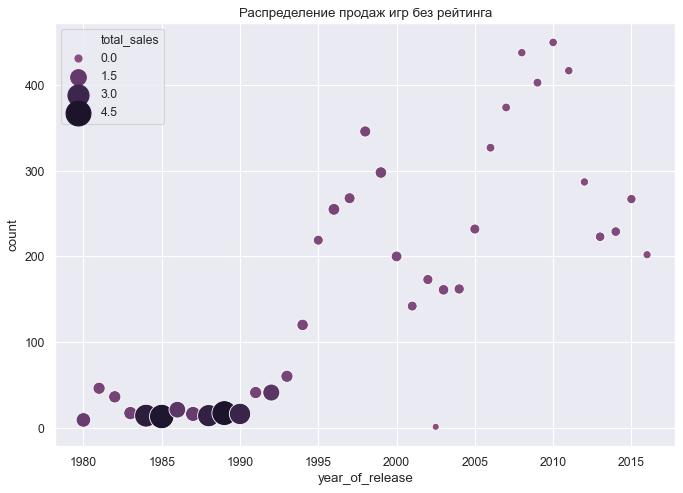

In [14]:
sns.set()
cmap = sns.cubehelix_palette(dark=.1, light=.4, as_cmap=True)
f, ax = plt.subplots(figsize=(10, 7), dpi= 80)
plt.title('Распределение продаж игр без рейтинга')
#
sns.scatterplot(x="year_of_release", y="count",
                     hue="total_sales", size="total_sales",
                     palette=cmap, sizes=(40, 500), 
                     data=no_rating)
plt.legend()
plt.show()

По графику можно выделить некоторую закономерность в пропусках в рейтинге и оценках. Все данные без оценок можно разделить, условно, на две группы:
- игры до 1993 года с высокими средними продажами. Их не очень много, веротно, это связано с тем что игр в этот период выходило мало.
- игры после 1995 года с низким количеством продаж.

Предположим, что пропуски в этих параметрах связаны с тем, что до 1993 года рейтинги и оценки не выставлялись совсем, а после 1993 года рейтинги отстутствуют у не популярных игр. 

In [15]:
print('Игр без рейтинга до 1993 года:', len(games.loc[(games['rating'].isna()==False) & 
                                                      (games['critic_score'].isna()==False) & 
                                                      (games['user_score'].isna()==False) &
                                                      (games['year_of_release']<1993) & 
                                                      (games['year_of_release']>0)]))
print('Игр c рейтингом до 1993 года:', len(games.loc[(games['rating'].isna()==True) & 
                                                      (games['critic_score'].isna()==True) & 
                                                      (games['user_score'].isna()==True) &
                                                      (games['year_of_release']<1993) & 
                                                      (games['year_of_release']>0)]))

Игр без рейтинга до 1993 года: 3
Игр c рейтингом до 1993 года: 301


In [16]:
games.loc[(games['rating'].isna()==False) & 
          (games['critic_score'].isna()==False) & 
          (games['user_score'].isna()==False) &
          (games['year_of_release']<1993) & 
          (games['year_of_release']>0)]

name platform  year_of_release       genre  na_sales  eu_sales  \
14470  Alter Ego       PC           1985.0  Simulation      0.00      0.03   
14610       Doom       PC           1992.0     Shooter      0.02      0.00   
14621    SimCity       PC           1988.0  Simulation      0.00      0.02   

       jp_sales  other_sales  critic_score user_score rating  total_sales  
14470       0.0         0.01          59.0        5.8      T         0.04  
14610       0.0         0.00          85.0        8.2      M         0.02  
14621       0.0         0.01          64.0        2.2   E10+         0.03

Есть всего 3 игры не подходящие под первую часть нашего предположения.

In [17]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
games.query('user_score == "tbd"')

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  total_sales  
119          tbd      E         6.70  
301          tbd   E10+         3.97  
520          tbd      T         2.81  
645          tbd      E         2.42  
657          tbd      E         2.40  
...          ...    ...          ...  
16695        tbd      E         0.01  
16697        tbd      E         0.01  
16698        tbd      E         0.01  
16704        tbd      E         0.01  
16706        tbd      T         0.01  

[2424 rows x 12 columns]

Обозначение tbd в столбце <b>user_score</b>, скорее всего, обозначает 'to be decided'. Так как значение ещё не определено, это равносильно отсутствию значения. Попробуем заменить эти значения на NaN. 

### Преобразование данных в нужные типы

Преобразуем данные в столбце year_of_release в целочисленный формат int.

Для этого заменим пропущеные значения на 0. Оно не похоже на номер года, это поможет отличить эти значения от тех где данные присутствуют.

In [19]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983,    0])

Данные в столбце critic_score тоже приведём к целочисленному значению.

In [20]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [21]:
games['critic_score'] = games['critic_score'].fillna(0)
games['critic_score'] = games['critic_score'].astype('int')
games['critic_score'].unique()

#games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce', downcast='integer')

array([76,  0, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

Пропуски в столбце rating заменим на значение «undefined»

In [22]:
games['rating'] = games['rating'].fillna('undefined')

<b>Вывод:</b> 
- Названия столбцов приведены в нижний регистр;
- Пропуски в столбце year_of_release были заменены на 0. Сами значения переведны в целочисленный формат для удобства.
- Пропуски в столбцах critic_score, user_score и rating, предположительно, имеют закономерность. Предположим, что пропуски в этих параметрах связаны с тем, что до 1993 года рейтинги и оценки не выставлялись совсем, а после 1993 года рейтинги отстутствуют у не популярных игр. 

## <a id='3'> 3. Исследовательский анализ данных:</a> 


### Проанализируем количество выпущеных игр по годам:

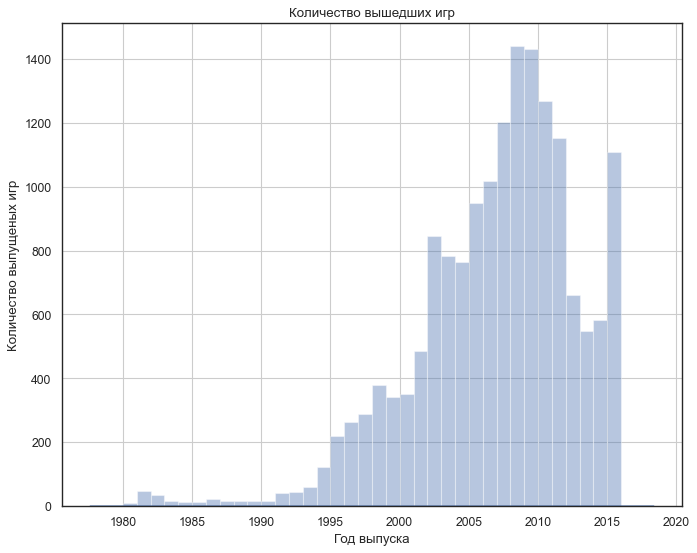

In [23]:
sns.set(style="white", palette="deep", color_codes=True)
cmap = sns.cubehelix_palette(dark=.1, light=.4, as_cmap=True)
f, ax = plt.subplots(figsize=(10, 8), dpi= 80)
plt.title('Количество вышедших игр')
sns.distplot(games.loc[games['year_of_release']>0, 'year_of_release'], bins=36, 
             hist_kws={'density':False}, kde_kws={'linewidth':1}, axlabel='Год выпуска')
ax.set_ylabel('Количество выпущеных игр')
ax.grid(True)
plt.show()

По гистограмме хорошо заметно что рост числа выпускаемых игр начался с 1994 года. А как мы выяснили ранее, до 1993 года у игр отстутсвуют и значения рейтинга и оценок. По этим данным может быть сложно оценить закономерность в успешности игр. 

### Проанализируем распредиление продаж по платформам:

Найдём сaмые популярные платформы. В качестве показателя примем суммарное кол-во проданых копий.

In [24]:
games.query('year_of_release>0').pivot_table(index='platform', values='total_sales',
                                             aggfunc=['sum', 'count']).sort_values([('sum','total_sales')],ascending=False)

sum       count
         total_sales total_sales
platform                        
PS2          1247.16        2140
X360          966.61        1250
PS3           935.19        1320
Wii           903.31        1301
DS            804.28        2129
PS            727.58        1190
PS4           314.14         392
GBA           313.73         813
PSP           293.57        1203
PC            258.86         970
3DS           258.53         515
XB            256.69         817
GB            254.43          97
NES           251.05          98
N64           218.48         318
SNES          200.04         239
GC            198.66         552
XOne          159.32         247
2600           89.01         117
WiiU           82.19         147
PSV            53.81         429
SAT            33.59         173
GEN            28.35          27
DC             15.95          52
SCD             1.86           6
NG              1.44          12
WS              1.42           6
TG16            0.16           2
3DO             0.10           3
GG              0.04           1
PCFX            0.03           1

Найдём средний "жизненный цикл" платформы.

In [25]:
life_cycle = games.query('year_of_release>0').pivot_table(index='platform', values='year_of_release',
                                             aggfunc=[min, max])
life_cycle['cycle'] = life_cycle[('max','year_of_release')] - life_cycle[('min','year_of_release')]
life_cycle

min             max cycle
         year_of_release year_of_release      
platform                                      
2600                1980            1999    19
3DO                 1994            1995     1
3DS                 2000            2016    16
DC                  1998            2008    10
DS                  1985            2013    28
GB                  1988            2001    13
GBA                 2000            2007     7
GC                  2001            2007     6
GEN                 1990            1994     4
GG                  1992            1992     0
N64                 1996            2004     8
NES                 1983            1994    11
NG                  1993            1996     3
PC                  1985            2016    31
PCFX                1996            1996     0
PS                  1994            2003     9
PS2                 2000            2011    11
PS3                 2005            2016    11
PS4                 2013            2016     3
PSP                 2004            2015    11
PSV                 2011            2016     5
SAT                 1994            1999     5
SCD                 1993            1994     1
SNES                1990            1999     9
TG16                1995            1995     0
WS                  1999            2001     2
Wii                 2006            2016    10
WiiU                2012            2016     4
X360                2005            2016    11
XB                  2000            2008     8
XOne                2013            2016     3

In [26]:
print('В среднем, платформы сущестуют на рынке', life_cycle['cycle'].median(), 'лет')

В среднем, платформы сущестуют на рынке 8.0 лет


По сводной таблице можно сказать что в среднем срок существования платформ длится 8 лет. За это время платформа переживает периоды "взлёта и падения". Предположим, если взять половину этого периоду, то в такой промежуток времени можно отследить на каком этапе находится та или иная платформа. Это позволит предсказать популярность.
В дальнейшем можно рассматривать прошедшие 4 года (с 2012 по 2016 года) как актуальный период.

In [27]:
top_platforms = games.query('year_of_release>2011').pivot_table(index=['year_of_release','platform'], 
                                                                                      values='total_sales',aggfunc='sum')
top_platforms = top_platforms.reset_index(drop=False)
top_platforms.platform.unique()

array(['3DS', 'DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'PS4', 'XOne'], dtype=object)

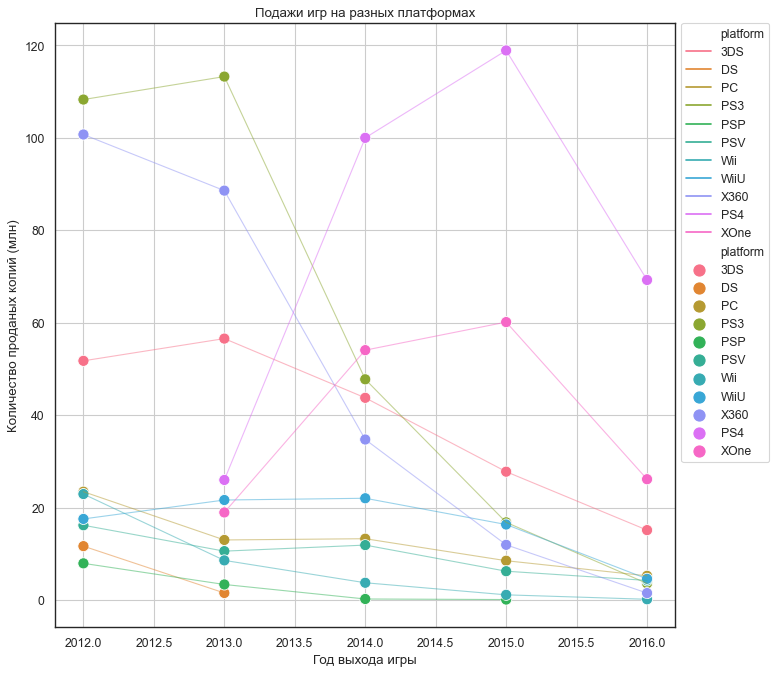

In [28]:
sns.set(style="white", palette="deep")

f, ax = plt.subplots(figsize=(10, 10), dpi= 80)
plt.title('Подажи игр на разных платформах')

sns.scatterplot(x="year_of_release", y="total_sales",
                     hue="platform", 
                     size="platform", sizes=(100, 100),
                     data=top_platforms)
sns.lineplot(x="year_of_release", y="total_sales",hue="platform",
             estimator=None, lw=1,alpha=.5 , data=top_platforms)

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
ax.grid(True)
ax.set_xlabel('Год выхода игры')
ax.set_ylabel('Количество проданых копий (млн)')
plt.show()

Только 11 платформ (3DS, DS, PC, PS3, PSP, PSV, Wii, WiiU, X360, PS4, XOne) всё ещё существуют на рынке на 2012-2016 года. Разумно в дальнейшем рассматривать только их. 
- В продажах игр на платформах XOne и PS4 наблюдается заметный рост. (так как данные за 2016 год считаем не полными)
- PC всё ещё держит средний уровень, как и на протяжении всех 30 лет.
- Остальные платформы сдают позиции.

In [29]:
top_eleven=top_platforms.platform.unique()

### Построим "ящик с усами" по продажам игр для популярных платформ:

In [30]:
current_period = games.query('year_of_release > 2011')

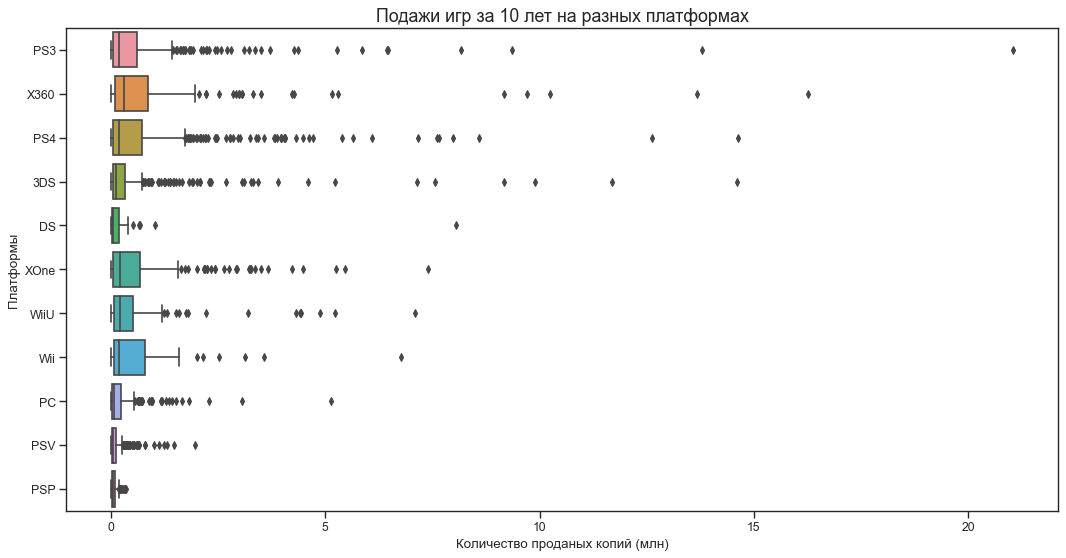

In [31]:
sns.set(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(16, 8), dpi= 80)
plt.title('Подажи игр за 10 лет на разных платформах', fontdict={'size': 16})
sns.boxplot(x="total_sales", y="platform",
            data=current_period.query('platform in @top_eleven'))
ax.set_xlabel('Количество проданых копий (млн)')
ax.set_ylabel('Платформы')
plt.show()

По графику можно заметить что большая часть игр, выходящих на платформах по продажам в мире не превышает 1 млн. 
Но так же присутствуют популярные игры. Чьё кол-вл продаж значительно перекашивает график вправо. 

In [32]:
import plotly.graph_objects as go
df = current_period.query('platform in @top_eleven')
#fig = go.Figure()
#for platform in top_eleven:
#    fig.add_trace(go.Violin(x=df['platform'][df['platform'] == platform],
#                            y=df['total_sales'][df['platform'] == platform],
#                            name=platform,
#                            box_visible=True,
#                            meanline_visible=True, hoverinfo='text', hover))

fig = px.box(df, x="platform", y="total_sales",  points='outliers',color='platform',
             hover_name="name", hover_data=["total_sales", "year_of_release"])
fig.update_layout(
    title='Подажи игр за 10 лет на разных платформах')
fig.show()

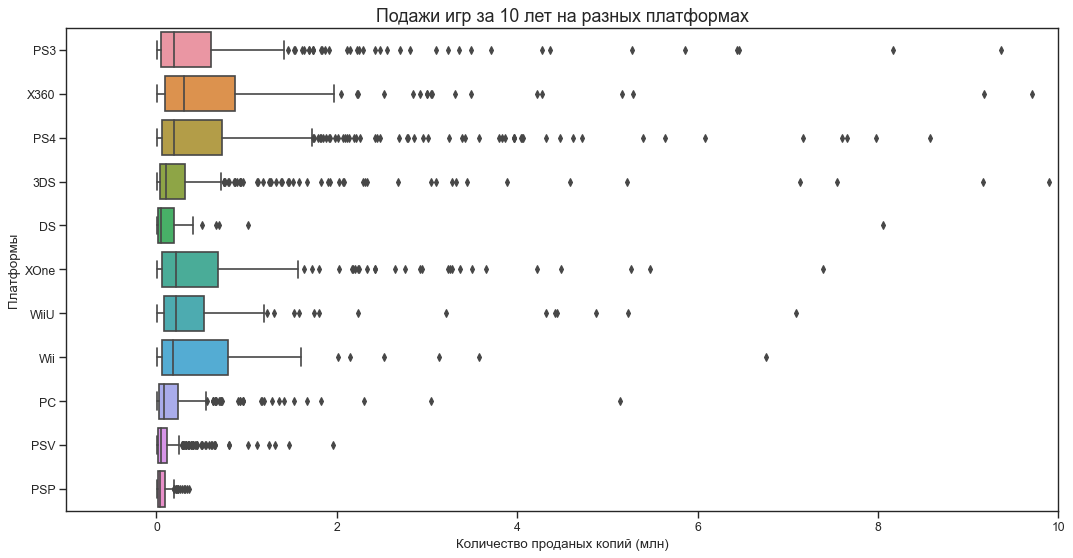

In [33]:
sns.set(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(16, 8), dpi= 80)
plt.title('Подажи игр за 10 лет на разных платформах', fontdict={'size': 16})
sns.boxplot(x="total_sales", y="platform",
            data=current_period.query('platform in @top_eleven')).set(xlim=(-1, 10))
ax.set_xlabel('Количество проданых копий (млн)')
ax.set_ylabel('Платформы')
plt.show()


### Проанализируем влияние отзывов на продажи для популярных платформ

Корреляция Пирсона между оценками и уровнем продаж для всех платформ:

In [34]:
current_period.loc[:,['user_score','critic_score', 'total_sales']].corr().loc[:,'total_sales']

user_score      0.004519
critic_score    0.248279
total_sales     1.000000
Name: total_sales, dtype: float64

In [35]:
def sctp(platform):
    sns.set(style="whitegrid")
    f, axes = plt.subplots(1,2,figsize=(15, 5), dpi= 80)
    
    sns.scatterplot(x="critic_score", y="total_sales",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=current_period.loc[current_period['platform']==platform],color="b", ax=axes[0])
    axes[0].set_xlabel('Отзывы критиков')
    axes[0].set_ylabel('Продажи')
    axes[0].set_title('Зависимость продаж игр на '+platform+' от оценки критиков', fontdict={'size': 12})
    
    
    sns.scatterplot(x='user_score', y="total_sales",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=current_period.loc[current_period['platform']==platform],color="g", ax=axes[1])    

    axes[1].set_xlabel('Отзывы пользователей')
    axes[1].set_ylabel('Продажи') 
    axes[1].set_title('Зависимость продаж игр на '+platform+' от оценки пользователей', fontdict={'size': 12})

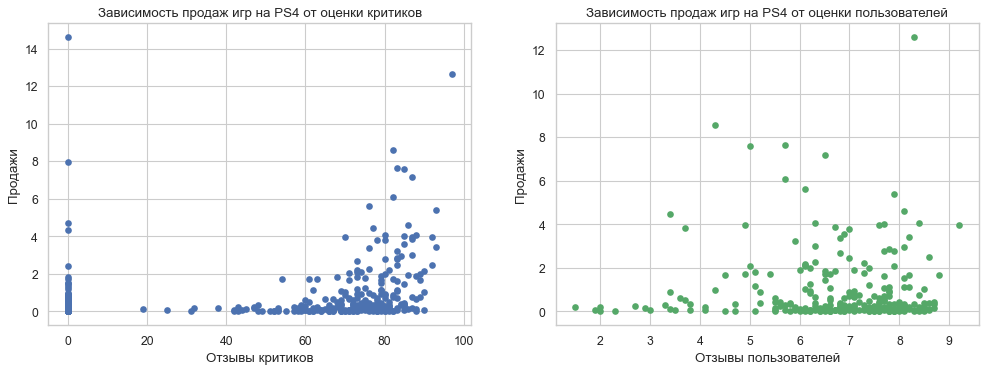

In [36]:
sctp('PS4')

Для консоли PS4, так же, наблюдается положительная корреляция с отзывами критиков, и более слабая с отзывами пользователей.

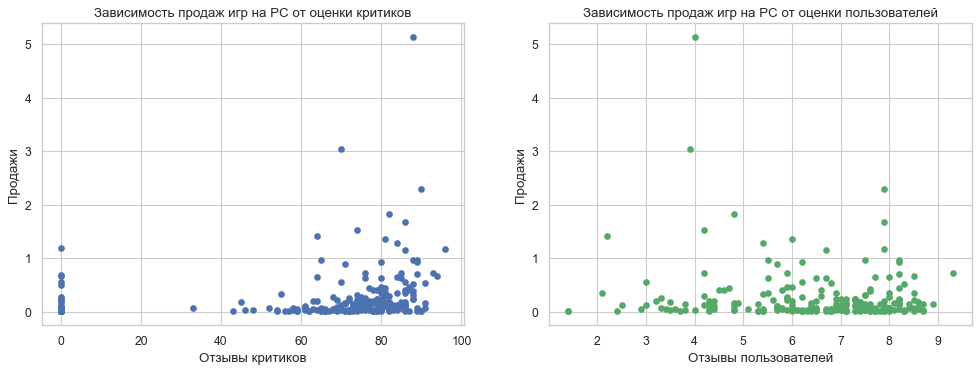

In [37]:
sctp('PC')

Для PC можно заметить положительную корреляцию между продажами и отзывами критиков, и почти незначительную корреляцию с отзывами пользователей.

In [38]:
def plotly_scatter(platform):
    df = current_period.loc[current_period['platform']==platform]
    fig = go.Figure(data=go.Scatter(x=df["critic_score"], 
                                y=df["total_sales"],
                                mode='markers',
                                marker_color=df['total_sales'],
                                text=df['name'])) 

    fig.update_layout(title='Зависимость продаж игр на '+platform+' от оценки критиков')
    fig.show()


In [39]:
plotly_scatter('X360')

### Проанализируем зависимость продаж от жанра

In [40]:
current_period.pivot_table(index='genre', values='total_sales',
                                             aggfunc=['sum', 'count', 'mean', 'median']).sort_values([('sum','total_sales')],ascending=False)

sum       count        mean      median
             total_sales total_sales total_sales total_sales
genre                                                       
Action            446.41        1041    0.428828       0.120
Shooter           304.75         237    1.285865       0.430
Role-Playing      192.80         370    0.521081       0.140
Sports            181.07         268    0.675634       0.240
Misc               85.28         193    0.441865       0.120
Platform           61.00          85    0.717647       0.210
Racing             53.50         115    0.465217       0.140
Fighting           44.49         109    0.408165       0.130
Simulation         35.12          80    0.439000       0.120
Adventure          29.43         302    0.097450       0.030
Strategy           13.34          71    0.187887       0.080
Puzzle              4.89          28    0.174643       0.045

In [41]:
genre_sales = current_period.pivot_table(index='genre',values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).reset_index(drop=False)
genre_sales

genre  total_sales
0         Action       446.41
1        Shooter       304.75
2   Role-Playing       192.80
3         Sports       181.07
4           Misc        85.28
5       Platform        61.00
6         Racing        53.50
7       Fighting        44.49
8     Simulation        35.12
9      Adventure        29.43
10      Strategy        13.34
11        Puzzle         4.89

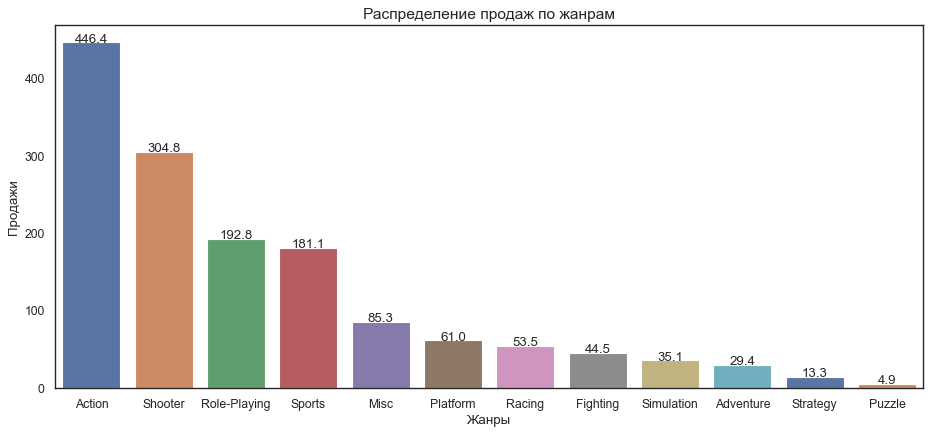

In [42]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(14, 6), dpi= 80)
sns.barplot(x="genre", y='total_sales', palette="deep", data=genre_sales)
for i, total_sales in enumerate(genre_sales.total_sales):
    ax.text(i, total_sales+0.5, round(total_sales, 1), horizontalalignment='center')
ax.set_xlabel('Жанры')
ax.set_ylabel('Продажи') 
ax.set_title('Распределение продаж по жанрам', fontdict={'size': 14})
plt.show()

Исходя из графика можно уверенно утверждать что игры в жанре <b>Action</b> самые популярные. На втором и третьем месте, соответсвенно, жанры <b>Shooter</b> и <b>Role-Playing</b>. В конце списка самые не популярные жанры <b>Puzzle</b> и <b>Strategy</b>.

## <a id='4'>4. Портрет пользователя каждого региона </a>
 

### Самые популярные платформы (топ-5)

In [43]:
top_platforms = current_period.pivot_table(index='platform', 
                                           values=['na_sales', 'eu_sales', 'jp_sales'], 
                                           aggfunc='sum').reset_index(drop=False)
top_platforms

platform  eu_sales  jp_sales  na_sales
0       3DS     42.83     87.79     55.49
1        DS      3.78      3.72      4.93
2        PC     38.38      0.00     19.26
3       PS3    107.27     35.29    103.74
4       PS4    141.09     15.96    108.74
5       PSP      0.52     10.71      0.23
6       PSV     11.36     21.04     10.98
7       Wii     12.34      3.39     18.14
8      WiiU     25.13     13.01     38.10
9      X360     74.89      1.57    140.57
10     XOne     51.59      0.34     93.12

In [44]:
from plotly.subplots import make_subplots

df = top_platforms
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df.platform,
                         values=df.eu_sales, name="Европа"), 1, 1)
fig.add_trace(go.Pie(labels=df.platform,
                         values=df.na_sales, name="Америка"), 1, 2)
fig.add_trace(go.Pie(labels=df.platform,
                         values=df.jp_sales, name="Япония"), 1, 3) 
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=10,
                  marker=dict(colors=px.colors.qualitative.Set2))
fig.update_layout(title={'text': 'Популярные платформы на территории рассматриваемых регионов', 
                        'x': 0.5,
                        'y': 0.9}, 
                  annotations=[dict(text='Европа', x=0.108, y=0.5, font_size=15, showarrow=False),
                               dict(text='Америка', x=0.5, y=0.5, font_size=15, showarrow=False),
                               dict(text='Япония', x=0.898, y=0.5, font_size=15, showarrow=False)])
fig.show()

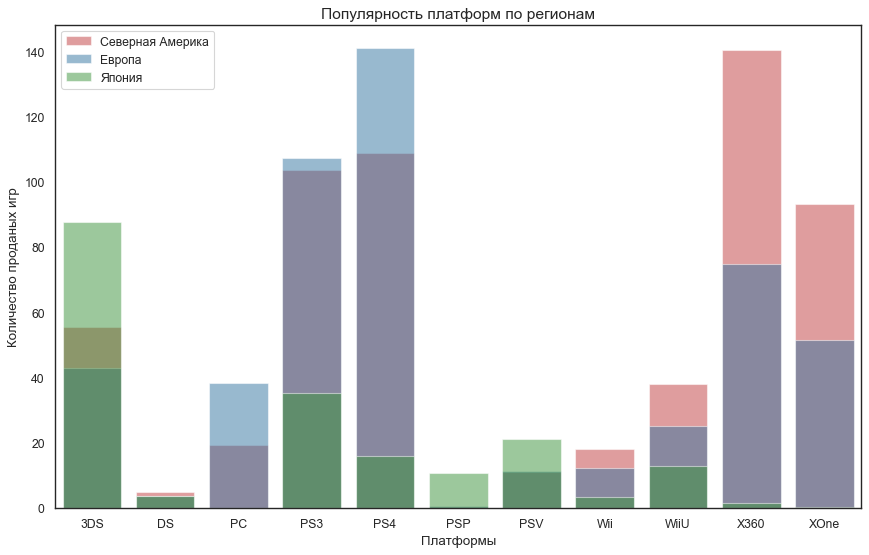

In [45]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(13,8), dpi= 80)
plt.title('Популярность платформ по регионам', fontdict={'fontsize':14})

ax=sns.barplot(x="platform", y='na_sales',  color='tab:red', data=top_platforms, alpha=.5, label='Северная Америка')
ax=sns.barplot(x="platform", y='eu_sales',  color='tab:blue', data=top_platforms, alpha=.5, label='Европа')
ax=sns.barplot(x="platform", y='jp_sales',  color='tab:green', data=top_platforms, alpha=.5, label='Япония')
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество проданых игр')
plt.legend()
plt.show()

In [46]:
print('Топ-5 игровых платформ в Северной Америке:', list(top_platforms.sort_values('na_sales', 
                                                                         ascending=False).head()['platform']))
print('Топ-5 игровых платформ в Европе:', list(top_platforms.sort_values('eu_sales', 
                                                                         ascending=False).head()['platform']))
print('Топ-5 игровых платформ в Японии:', list(top_platforms.sort_values('jp_sales', 
                                                                         ascending=False).head()['platform']))

Топ-5 игровых платформ в Северной Америке: ['X360', 'PS4', 'PS3', 'XOne', '3DS']
Топ-5 игровых платформ в Европе: ['PS4', 'PS3', 'X360', 'XOne', '3DS']
Топ-5 игровых платформ в Японии: ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']


Пятёрки лидеров среди платформ в трёх представленных регионах заметно отличаются. 
- На первом месте в Северной Америке <b>X360</b>, по Европе он только на третьем месте, а в пятёрку лидеров по Японии даже не вошёл. 
- В Европе лидирует <b>PS4</b>, в Америке он на втором месте, а в Японии аж на четвёртом. 
- Возглавляет список популярных в Японии платформ <b>3DS</b>, он же в двух других списках только на пятом месте.

### Самые популярные жанры (топ-5)

In [47]:
top_genres = current_period.pivot_table(index='genre', 
                                        values=['na_sales', 'eu_sales', 'jp_sales'], 
                                        aggfunc='sum').reset_index(drop=False)
top_genres

genre  eu_sales  jp_sales  na_sales
0         Action    161.70     52.80    180.15
1      Adventure      9.46      8.24      8.92
2       Fighting     10.79      9.44     19.79
3           Misc     26.32     13.10     38.19
4       Platform     21.41      8.63     25.38
5         Puzzle      1.40      2.14      1.13
6         Racing     27.29      2.50     17.22
7   Role-Playing     48.53     65.44     64.00
8        Shooter    113.47      9.23    144.79
9     Simulation     14.55     10.41      7.97
10        Sports     69.09      8.01     81.53
11      Strategy      5.17      2.88      4.23

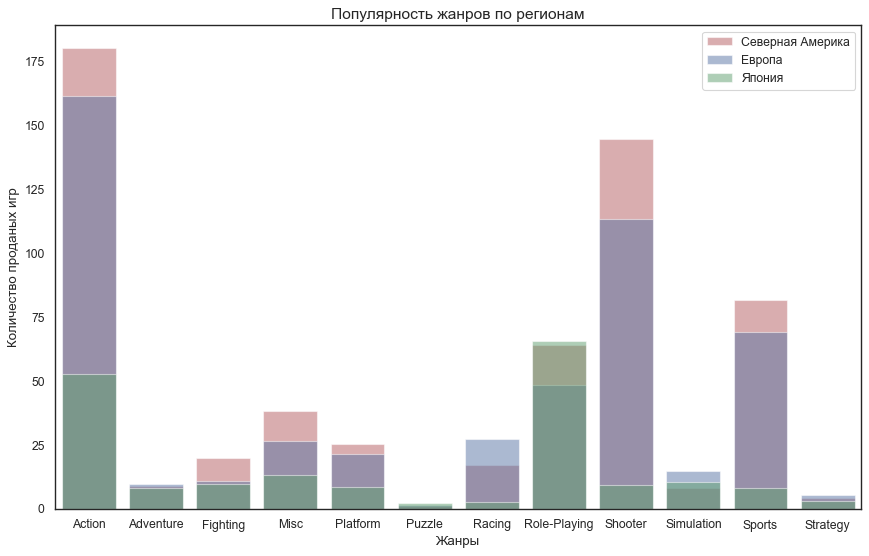

In [48]:
sns.set(style="white", palette="deep", color_codes=True)
fig, ax = plt.subplots(figsize=(13,8), dpi= 80)
plt.title('Популярность жанров по регионам', fontdict={'fontsize':14})

ax=sns.barplot(x="genre", y='na_sales', color='r', data=top_genres, alpha=.5, label='Северная Америка')
ax=sns.barplot(x="genre", y='eu_sales', color='b', data=top_genres, alpha=.5, label='Европа')
ax=sns.barplot(x="genre", y='jp_sales', color='g', data=top_genres, alpha=.5, label='Япония')
ax.set_xlabel('Жанры')
ax.set_ylabel('Количество проданых игр')
plt.legend()
plt.show()

In [49]:
print('Топ-5 игровых жанров в Северной Америке:', list(top_genres.sort_values('na_sales', 
                                                                         ascending=False).head()['genre']))
print('Топ-5 игровых жанров в Европе:', list(top_genres.sort_values('eu_sales', 
                                                                         ascending=False).head()['genre']))
print('Топ-5 игровых жанров в Японии:', list(top_genres.sort_values('jp_sales', 
                                                                         ascending=False).head()['genre']))

Топ-5 игровых жанров в Северной Америке: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
Топ-5 игровых жанров в Европе: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Топ-5 игровых жанров в Японии: ['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting']


По графику хорошо заметно что в Европе и Северной Америке самым популярным жанром является <b>Action</b>, тогда как в Японии это <b>Role-Playing</b>. Японский рынок игр, в целом, отличается от западного. Например, жанр <b>Shooter</b> вообще не вошёл в пятёрку лидеров в этой стране.

### Вляние рейтинга ESRB на продажи по регионам

In [50]:
esrb = current_period.pivot_table(index='rating', 
                                        values=['na_sales', 'eu_sales', 'jp_sales'], 
                                        aggfunc='sum').reset_index(drop=False)
esrb

rating  eu_sales  jp_sales  na_sales
0          E    113.03     28.33    114.37
1       E10+     57.25      8.19     77.93
2          M    194.44     21.20    231.67
3          T     52.96     26.02     66.02
4  undefined     91.50    109.08    103.31

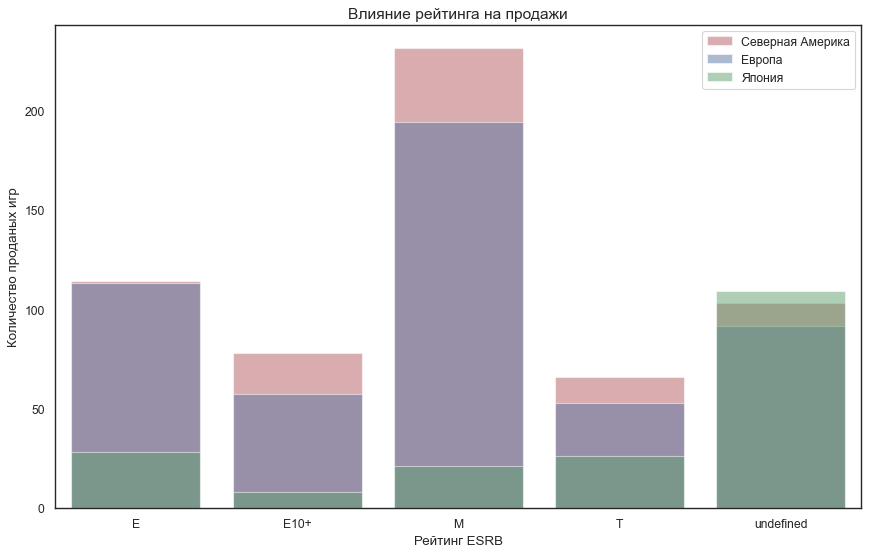

In [51]:
sns.set(style="white", palette="deep", color_codes=True)
fig, ax = plt.subplots(figsize=(13,8), dpi= 80)
plt.title('Влияние рейтинга на продажи', fontdict={'fontsize':14})

ax=sns.barplot(x="rating", y='na_sales', color='r', data=esrb, alpha=.5, label='Северная Америка')
ax=sns.barplot(x="rating", y='eu_sales', color='b', data=esrb, alpha=.5, label='Европа')
ax=sns.barplot(x="rating", y='jp_sales', color='g', data=esrb, alpha=.5, label='Япония')
ax.set_xlabel('Рейтинг ESRB')
ax.set_ylabel('Количество проданых игр')
plt.legend()
plt.show()

Самыми популярными на западе являются игры в жанрах  <b>M</b> («От 17 лет»), <b>E</b> («Для всех»), а самыми не популярными: <b>T</b> («Подросткам 13—19 лет») и <b>E10+</b> («Для всех старше 10 лет»)

В Японии поять картина немного иная: Самые популярные игры в жанре <b>E</b> и <b>T</b>, а менее популярные  <b>E10+</b>

## <a id='5'> 5. Проверка гипотез</a>
 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В нулевой гипотезе предположим что средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> одинаковые. Тогда альтернативная гипотеза будет звучать так: средние рейтинги платформ <b>Xbox One</b> и <b>PC</b> отличаются.

In [52]:
xbox_user_score = current_period.loc[current_period['platform']=='XOne']['user_score'].dropna()
pc_user_score = current_period.loc[current_period['platform']=='PC']['user_score'].dropna()

In [53]:

alpha = 0.05
stat, p = st.shapiro(xbox_user_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Выборка 1 соответствует распредилению Гаусса')
else:
    print('Выборка 1 не соответствует распредилению Гаусса')
print('Дисперсия: ', np.var(xbox_user_score))    
stat2, p2 = st.shapiro(pc_user_score)
print('Statistics=%.3f, p=%.3f' % (stat2, p2))

if p2 > alpha:
    print('Выборка 2 соответствует распредилению Гаусса')
else:
    print('Выборка 2 не соответствует распредилению Гаусса')
print('Дисперсия: ', np.var(pc_user_score)) 

Statistics=0.955, p=0.000
Выборка 1 не соответствует распредилению Гаусса
Дисперсия:  1.8965188383045533
Statistics=0.939, p=0.000
Выборка 2 не соответствует распредилению Гаусса
Дисперсия:  2.7341384964398827


Мы не можем воспользоваться критерием Стьюдента для проверки гипотезы.

Используем непараметрический критерий Манна-Уитни:

In [54]:
alpha = .01 
results = st.mannwhitneyu(
    xbox_user_score, 
    pc_user_score, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7992357678646063
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
Нет оснований отвергать нулевую гипотезу. 
Считаем, что эмпирически полученные данные не противоречат нулевой гипотезе. Будем считать что средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> не отличаются.

 ###  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую гипотезу так:
- средние пользовательские рейтинги жанров Action и Sports не отличаются.

Тогда альтернативная гипотеза будет гласить, что они различны.

In [55]:
action_user_score = current_period.loc[current_period['genre']=='Action']['user_score'].dropna()
sports_user_score = current_period.loc[current_period['genre']=='Sports']['user_score'].dropna()

alpha = .01 #объём выборок больше 100. Критический уровень статистической значимости 1% даст более точные результаты.

results = st.ttest_ind(
    action_user_score, 
    sports_user_score, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


#### Вывод:
Отвергаем нулевую гипотезу. Вероятность различия средних пользовательских рейтингов жанров  Action и Sports весьма велика.

## <a id='1'> 6. Вывод:</a> 


По данным из открытых источников можно проследить закономерности в популярности игр и сделать ставку на потенциально успешные продукты.

### Игровые платформы:
в среднем срок существования платформ длится 8 лет. За это время платформа переживает периоды "взлёта и падения". Предположим, если взять половину этого периоду, то в такой промежуток времени можно отследить на каком этапе находится та или иная платформа.

Только 11 платформ (<b>3DS, DS, PC, PS3, PSP, PSV, Wii, WiiU, X360, PS4, XOne</b>) всё ещё существуют на рынке на 2012-2016 года. Разумно в дальнейшем рассматривать только их. 
- В продажах игр на платформах XOne и PS4 наблюдается заметный рост. (так как данные за 2016 год считаем не полными)
- PC всё ещё держит средний уровень, как и на протяжении всех 30 лет.
- Остальные платформы сдают позиции.


#### По регионам:

- Топ-5 игровых платформ в Северной Америке: <b>X360, PS4, PS3, XOne, 3DS</b>
- Топ-5 игровых платформ в Европе: <b>PS4, PS3, X360, XOne, 3DS</b>
- Топ-5 игровых платформ в Японии: <b>3DS, PS3, PSV, PS4, WiiU</b>

Пятёрки лидеров среди платформ в трёх представленных регионах заметно отличаются. 
- На первом месте в Северной Америке <b>X360</b>, по Европе он только на третьем месте, а в пятёрку лидеров по Японии даже не вошёл. 
- В Европе лидирует <b>PS4</b>, в Америке он на втором месте, а в Японии аж на четвёртом. 
- Возглавляет список популярных в Японии платформ <b>3DS</b>, он же в двух других списках только на пятом месте.

### Жанры:
По данным о продажах по миру можно уверенно утверждать что игры в жанре <b>Action</b> самые популярные. На втором и третьем месте, соответсвенно, жанры <b>Shooter</b> и <b>Role-Playing</b>. В конце списка самые не популярные жанры <b>Puzzle</b> и <b>Strategy</b>.

#### По регионам:
- Топ-5 игровых жанров в Северной Америке: <b>Action, Sports, Shooter, Misc, Role-Playing</b>
- Топ-5 игровых жанров в Европе: <b>Action, Sports, Shooter, Misc, Racing</b>
- Топ-5 игровых жанров в Японии: <b>Role-Playing, Action, Misc, Sports, Platform</b>

По графику хорошо заметно что в Европе и Северной Америке самым популярным жанром является <b>Action</b>, тогда как в Японии это <b>Role-Playing</b>. Японский рынок игр, в целом, отличается от западного. Например, жанр <b>Shooter</b> вообще не вошёл в пятёрку лидеров в этой стране.

### Влияние оценок и рейтинга:

Самыми популярными на западе являются игры в жанрах  <b>M</b> («От 17 лет»), <b>E</b> («Для всех»), а самыми не популярными: <b>T</b> («Подросткам 13—19 лет») и <b>E10+</b> («Для всех старше 10 лет»)

В Японии поять картина немного иная: Самые популярные игры в жанре <b>E</b> и <b>T</b>, а менее популярные  <b>E10+</b>

В целом, наблюдается незначительная положительная корреляция между продажами и оценками критиков. Корреляция с оценками пользователей практически отсутствует.